In [112]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [114]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [115]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [116]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

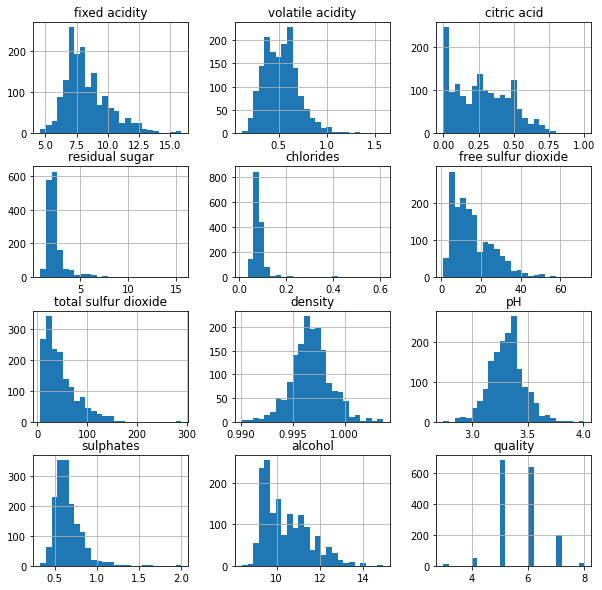

In [117]:
df.hist(bins=25,figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

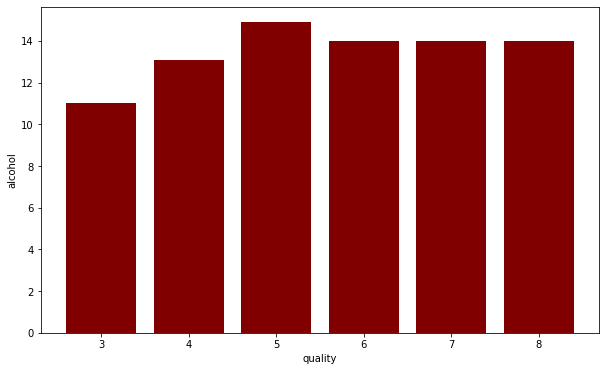

In [118]:
plt.figure(figsize=[10,6])
plt.bar(df['quality'],df['alcohol'],color='maroon')
plt.xlabel('quality')
plt.ylabel('alcohol')

<AxesSubplot:>

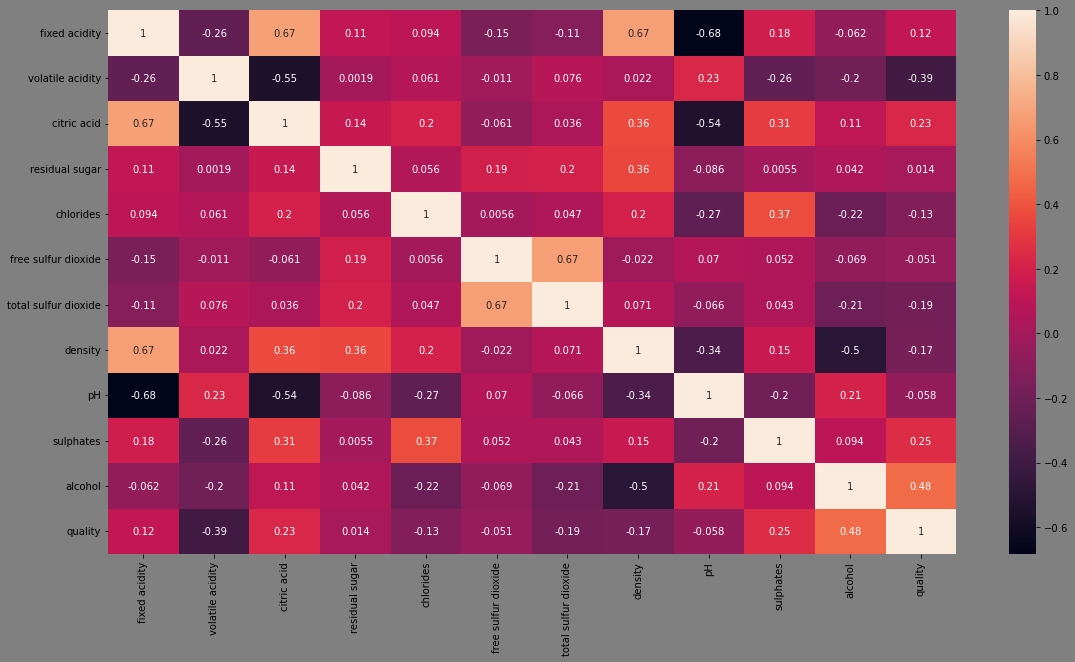

In [119]:
plt.figure(figsize=[19,10],facecolor='grey')
sb.heatmap(df.corr(),annot=True)

In [120]:
#correlation
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

In [121]:
new_df=df.drop('total sulfur dioxide',axis=1)

In [122]:
new_df.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [123]:
new_df.update(new_df.fillna(new_df.mean()))


In [124]:
next_df = pd.get_dummies(new_df,drop_first=True)
next_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


In [125]:
cat = new_df.select_dtypes(include='O')
# dummies of categorical columns
df_dummies = pd.get_dummies(new_df,drop_first = True)
print(df_dummies)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [126]:
df_dummies['best quality']=[1 if x>=7 else 0 for x in df.quality]
print(df_dummies)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [127]:
#Dataset
from sklearn.model_selection import train_test_split
x = df_dummies.drop(['quality','best quality'],axis=1)
y = df_dummies['best quality']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)

In [128]:
#Normalisation

In [129]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(xtrain)
scal_xtrain = norm_fit.transform(xtrain)
scal_xtest = norm_fit.transform(xtest)
print(scal_xtrain)

[[0.33628319 0.41322314 0.12       ... 0.50393701 0.33532934 0.52307692]
 [0.3539823  0.4338843  0.25       ... 0.42519685 0.16167665 0.24615385]
 [0.47787611 0.19008264 0.45       ... 0.32283465 0.05988024 0.15384615]
 ...
 [0.23893805 0.43801653 0.         ... 0.51181102 0.08383234 0.24615385]
 [0.28318584 0.33884298 0.33       ... 0.44094488 0.16167665 0.16923077]
 [0.38938053 0.39669421 0.29       ... 0.47244094 0.14371257 0.24615385]]


In [130]:
#Model:Decision tree

In [131]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(xtrain, ytrain)
y_pred = dt.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       272
           1       0.68      0.58      0.63        48

    accuracy                           0.90       320
   macro avg       0.81      0.77      0.78       320
weighted avg       0.89      0.90      0.89       320



In [132]:
#Model:Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
rnd = RandomForestClassifier()
fit_rnd = rnd.fit(xtrain,ytrain)
rnd_score = rnd.score(xtest,ytest) 
print('score of model is : ',rnd_score) 
print('.................................') 
print('calculating the error') 
x_predict = list(rnd.predict(xtest))
df = {'predicted':x_predict,'original':ytest}
print(classification_report(ytest,x_predict))

score of model is :  0.9125
.................................
calculating the error
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       272
           1       0.81      0.54      0.65        48

    accuracy                           0.91       320
   macro avg       0.87      0.76      0.80       320
weighted avg       0.91      0.91      0.90       320



In [134]:
#Radient Boost

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
rb = GradientBoostingClassifier(random_state=1)
rb.fit(xtrain, ytrain)
y_pred = rb.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       272
           1       0.73      0.50      0.59        48

    accuracy                           0.90       320
   macro avg       0.82      0.73      0.77       320
weighted avg       0.89      0.90      0.89       320



In [136]:
#Multi variable Linear Regression

In [137]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

print('Training data r-squared:', lr.score(xtrain, ytrain))
print('Test data r-squared:', lr.score(xtest, ytest))

print('Intercept', lr.intercept_)
pd.DataFrame(data=lr.coef_, index=xtrain.columns, columns=['coef']) 

Training data r-squared: 0.23402285231101327
Test data r-squared: 0.25405265312516945
Intercept 32.16785285917449


,coef
fixed acidity,0.031502
volatile acidity,-0.187820
citric acid,0.063469
residual sugar,0.022696
chlorides,-0.626752
free sulfur dioxide,-0.001932
density,-33.450478
pH,0.022643
sulphates,0.303338
alcohol,0.084314


In [138]:
#Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=40)
logr.fit(xtrain, ytrain)

C:\Users\HUCON SOLUTIONS PVT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=40)

In [140]:
train_accuracy = lr.score(xtrain, ytrain)
test_accuracy = lr.score(xtest, ytest)
print('One-vs-rest', '-'*40, 
      'Accuracy Score of Train Model : {:.2f}'.format(train_accuracy), 
      'Accuracy Score of Test  Model : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
----------------------------------------
Accuracy Score of Train Model : 0.23
Accuracy Score of Test  Model : 0.25


In [141]:
# ROC curve

C:\Users\HUCON SOLUTIONS PVT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


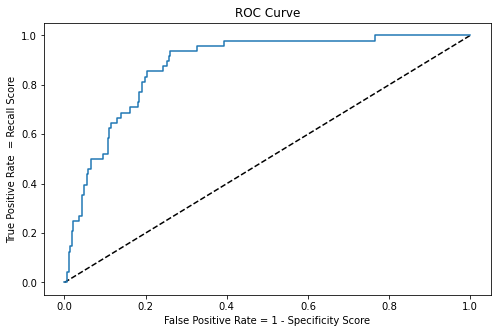

In [142]:
from sklearn.metrics import roc_curve, roc_auc_score
quality_pred = LogisticRegression(random_state=40)
quality_pred.fit(xtrain,ytrain)
probs = quality_pred.predict_proba(xtest)[:,1]  
fpr, tpr, thresholds  = roc_curve(ytest, probs)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve')
plt.show()

In [143]:
#Hyper Parameter Tuning

In [144]:
logreg = LogisticRegression()
print(logreg.get_params())


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [146]:
pd.DataFrame(df).head(5)

,predicted,original
1035,0,1
49,0,0
799,0,0
538,1,1
660,0,0
